# Universidade Federal de Minas Gerais 
## ICEX - Departamento de Ciência de Computação

### Trabalho de FECD
 
##### Professor Dr. Renato Assunção
###### Aluno: Jesimon Barreto Santos - 2016070093

#### Fazer os exercícios 4, 7, 12, 16, 21 do Capítulo 3 (Variáveis Aleatórias) do Livro de Exercícios.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import gamma
from statsmodels.distributions.empirical_distribution import ECDF
import math

### EX 4

In [3]:
mu, sigma = 0, 1

x1 = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y1 = stats.norm.pdf(x1, mu, sigma)

mu, sigma = 2, 1

x2 = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y2 = stats.norm.pdf(x2, mu, sigma)

mu, sigma = 0, 2
x3 = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y3 = stats.norm.pdf(x3, mu, sigma)


mu, sigma = 2, 2
x4 = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y4 = stats.norm.pdf(x4, mu, sigma)





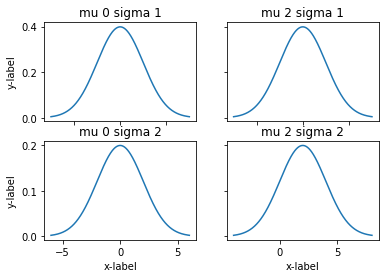

In [4]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x1,y1)
axs[0, 0].set_title('mu 0 sigma 1')
axs[0, 1].plot(x2,y2)
axs[0, 1].set_title('mu 2 sigma 1')
axs[1, 0].plot(x3,y3)
axs[1, 0].set_title('mu 0 sigma 2')
axs[1, 1].plot(x4,y4)
axs[1, 1].set_title('mu 2 sigma 2')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()


### Respostas
No valor da média (mu). O valor máximo não depende do desvio padrão (sigma). A altura depende do desvio, dependendo do valor do desvio padrão a curva será mais esparça ou mais curta e o ponto máximo será menor ou maior.

In [5]:
x1 = 10 - 2 * np.sqrt(5)
x2 = 10 + 2 * np.sqrt(5)

a = norm.cdf(0.95, loc=10, scale=5)

print('Valor onde espera-se uma densidade 0.95 em {}'.format(a))

Valor onde espera-se uma densidade 0.95 em 0.03514789358403879


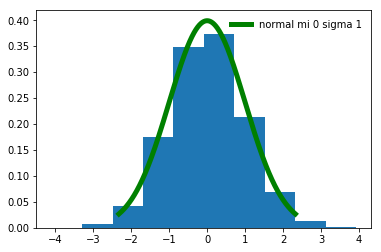

In [6]:
#mi = 0, sigma = 1

fig, ax = plt.subplots(1, 1)

x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 10000)
ax.plot(x, norm.pdf(x),'g-', lw=5, label='normal mi 0 sigma 1')
r = norm.rvs(size=10000)
ax.hist(r, density=True)
ax.legend(loc='best', frameon=False)
plt.show()

### Ex 7

É uma função gaussiana positiva com valor de mu = 0 e sigma 1.432394487827058
E[X] = 1/lambda => E[x] = 3.0
F(X) é dado no gráfico abaixo
P(X>3) = 1 - p(X<3) = 0.8773735196095193


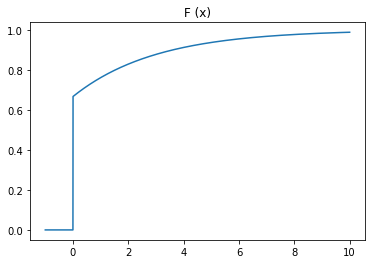

In [7]:
def func(x, lbd):
    y = []
    for v in x:
        if v < 0:
            y.append(0)
        else:
            y.append(1 - lbd * np.exp(- lbd * v))
    return np.array(y)


x = np.linspace(-1, 10, 10000)
y = func(x,1/3)

plt.title('F (x)')
plt.plot(x,y)




# 3² = 2*pi*sigma => sigma = 9/(2*pi)
sigma = 9/(2*np.pi)
print('É uma função gaussiana positiva com valor de mu = 0 e sigma {}'.format(sigma))
print('E[X] = 1/lambda => E[x] = {}'.format(1/(1/3)))
print('F(X) é dado no gráfico abaixo')
print('P(X>3) = 1 - p(X<3) = {}'.format(1-(1/3 * np.exp(- 1/3 * 3))))

plt.show()

### Ex 12

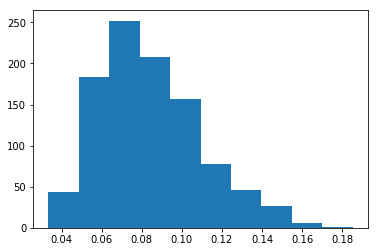

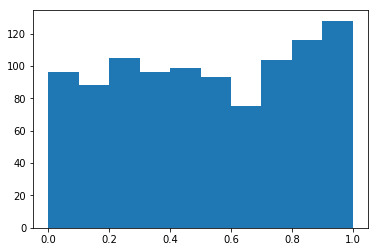

In [8]:
n_bins = 10
st = []
pv = []
for i in range(1000):
    values = stats.norm.rvs(0,1,size=100)
    s,p = stats.kstest(values, stats.norm.cdf, args=(0,1))
    st.append(s)
    pv.append(p)
p_v_less_05 = np.where(np.array(pv) < 0.05)
plt.hist(st, bins = n_bins)
plt.show()
plt.hist(pv, bins = n_bins)
plt.show()

In [9]:
len(p_v_less_05[0])

48

### Resposta

Quando o modelo proposto coincide com o processo gerado espera-se um valor D entre 0.06 e 0.1.

Ficaram com p_valor abaixo de 0.05: 42 valores

### Ex 16

In [10]:
n = 50

values = stats.norm.rvs(0,1, size=n)
sc,pc = stats.kstest(values, stats.norm.cdf, args=(0,1))
se,pe = stats.kstest(values, stats.norm.cdf, args=(0,10))

print('Valores com o teste correto: ')
print('D, p_valor, raiz de n * D: {}, {}, {}'.format(sc,pc,np.sqrt(n)*sc))

print('Valores com o teste incorreto: ')
print('D, p_valor, raiz de n * D: {}, {}, {}'.format(se,pe,np.sqrt(n)*se))

Valores com o teste correto: 
D, p_valor, raiz de n * D: 0.09700535131451249, 0.7332019830244718, 0.6859314172587515
Valores com o teste incorreto: 
D, p_valor, raiz de n * D: 0.42449983135414626, 1.0869650290956656e-08, 3.0016670936306262


### Ex 21

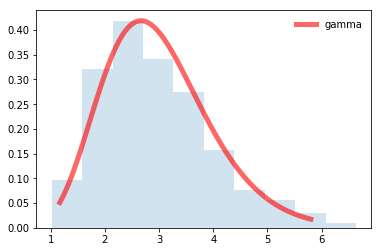

Média dos valores 2.948578927510146


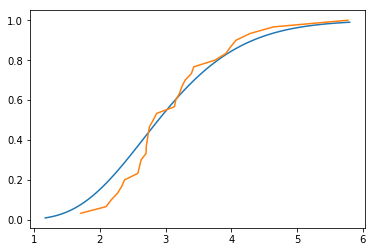

In [11]:
a,b  = 9, 3

scale= 1/b
fig, ax = plt.subplots(1, 1)
x = np.linspace(gamma.ppf(0.01, a,scale=scale), gamma.ppf(0.99, a,scale=scale), 100)
ax.plot(x, gamma.pdf(x, a, scale=scale),'r-', lw=5, alpha=0.6, label='gamma')
rv = gamma(a)
values = gamma.rvs(a,scale=scale, size=350, random_state=None)
ax.hist(values, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

print('Média dos valores {}'.format(np.mean(values)))


curve_acc = gamma.cdf(x, a, scale=scale)
values = gamma.rvs(a,scale=scale, size=30, random_state=None)
ecdf = ECDF(values)
plt.plot(x,curve_acc)
plt.plot(ecdf.x,ecdf.y)

### Resposta

Sim. O histograma e a curva são parecidos.

A curva gerada empriricamente e a e a distribuição do gráfico se parecem e são próximas.